In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np, numpy.ma as ma
import pandas as pd
from cartopy import crs as ccrs
from datetime import timedelta
import glob


In [63]:
ds = xr.open_dataset("data/NUCAPS-EDR_v3r0_j01_s202211170044310_e202211170045010_c202211170121580.nc")

In [64]:
ds

<xarray.Dataset>
Dimensions:               (Number_of_CrIS_FORs: 120, Number_of_Ispares: 129,
                           Number_of_Rspares: 298, Number_of_Cloud_Layers: 8,
                           Number_of_P_Levels: 100,
                           Number_of_MW_Spectral_Pts: 16,
                           Number_of_Surf_Emis_Hinge_Pts: 100,
                           Number_of_Stability_Parameters: 16,
                           Number_of_Cloud_Emis_Hing_Pts: 100)
Coordinates:
    Time                  (Number_of_CrIS_FORs) datetime64[ns] ...
    Latitude              (Number_of_CrIS_FORs) float32 ...
    Longitude             (Number_of_CrIS_FORs) float32 ...
    Pressure              (Number_of_CrIS_FORs, Number_of_P_Levels) float32 ...
    Effective_Pressure    (Number_of_CrIS_FORs, Number_of_P_Levels) float32 ...
Dimensions without coordinates: Number_of_CrIS_FORs, Number_of_Ispares,
                                Number_of_Rspares, Number_of_Cloud_Layers,
                                Number_of_P_Levels, Number_of_MW_Spectral_Pts,
                                Number_of_Surf_Emis_Hinge_Pts,
                                Number_of_Stability_Parameters,
                                Number_of_Cloud_Emis_Hing_Pts
Data variables: (12/64)
    quality_information   |S1 ...
    CrIS_FORs             (Number_of_CrIS_FORs) float64 ...
    View_Angle            (Number_of_CrIS_FORs) float32 ...
    Satellite_Height      (Number_of_CrIS_FORs) float32 ...
    FG_Mean_CO2           (Number_of_CrIS_FORs) float32 ...
    Mean_CO2              (Number_of_CrIS_FORs) float32 ...
    ...                    ...
    FG_IR_Surface_Emis    (Number_of_CrIS_FORs, Number_of_Surf_Emis_Hinge_Pts) float32 ...
    IR_Surface_Refl       (Number_of_CrIS_FORs, Number_of_Surf_Emis_Hinge_Pts) float32 ...
    Stability             (Number_of_CrIS_FORs, Number_of_Stability_Parameters) float32 ...
    Cloud_Freq            (Number_of_CrIS_FORs, Number_of_Cloud_Layers, Number_of_Cloud_Emis_Hing_Pts) float32 ...
    Cloud_Emis            (Number_of_CrIS_FORs, Number_of_Cloud_Layers, Number_of_Cloud_Emis_Hing_Pts) float32 ...
    Cloud_Refl            (Number_of_CrIS_FORs, Number_of_Cloud_Layers, Number_of_Cloud_Emis_Hing_Pts) float32 ...
Attributes: (12/51)
    Conventions:                              CF-1.5
    Metadata_Conventions:                     CF-1.5, Unidata Datasset Discov...
    standard_name_vocabulary:                 CF Standard Name Table (version...
    project:                                  NPP Data Exploitation
    title:                                    NUCAPS_EDR
    summary:                                  NUCAPS retrieved profiles of te...
    ...                                       ...
    production_environment:                   OE
    number_valid_scans:                       4
    geospatial_bounds:                        POLYGON((-177.92 -15.06, -170.3...
    instrument_resolution:                    CrIS 2211 channels
    number_valid_fovs:                        9
    retrieval_mode:                           IR+MW

In [67]:
# Extracting variables from the netcdf file

air_temp = ds['Temperature']
qc = ds['Quality_Flag']
lon = ds['Longitude']
lat = ds['Latitude']

type(air_temp)

xarray.core.dataarray.DataArray

In [69]:
# To extract just the data (and not the metadata)
air_temp_vals = ds['Temperature'].values

type(air_temp_vals)

numpy.ndarray

# Subsetting data usign xarray

In [76]:
# Picking a element cell from the dataset
air_temp.isel(Number_of_CrIS_FORs=0, Number_of_P_Level=slice()

<xarray.DataArray 'Temperature' (Number_of_P_Levels: 100)>
array([183.54982, 192.04077, 208.50386, 228.14325, 243.36224, 252.4315 ,
       257.2103 , 260.0549 , 262.38345, 263.76312, 261.7059 , 259.25177,
       255.8229 , 251.10406, 245.85541, 241.64394, 237.76653, 235.16078,
       232.85875, 231.2438 , 229.98982, 228.89961, 227.64485, 226.21216,
       224.71996, 222.94987, 220.91763, 218.95042, 216.9925 , 215.0878 ,
       213.18994, 211.49294, 209.71503, 208.02045, 206.25046, 204.35652,
       202.30933, 200.46472, 198.81941, 197.59285, 196.50066, 196.08203,
       196.4743 , 197.42966, 198.85185, 200.53935, 202.3632 , 204.35301,
       206.49321, 208.69812, 210.99657, 213.35419, 215.76894, 218.27052,
       220.9236 , 223.59727, 226.16956, 228.61989, 230.96097, 233.31442,
       235.51984, 237.68076, 239.84325, 242.08679, 244.38121, 246.69315,
       249.04726, 251.34727, 253.63786, 255.94849, 258.1537 , 260.2965 ,
       262.4166 , 264.4224 , 266.4045 , 268.35806, 270.25778, 272.2035 ,
       274.1782 , 276.38727, 278.3721 , 280.14517, 282.0136 , 283.59805,
       285.01395, 286.30295, 287.37268, 288.33716, 289.25824, 289.96045,
       290.62772, 291.42242, 292.70242, 293.87872, 295.7893 , 298.6033 ,
       300.22598, 300.22598, 300.22598, 300.22598], dtype=float32)
Coordinates:
    Time                datetime64[ns] ...
    Latitude            float32 -15.0
    Longitude           float32 -177.2
    Pressure            (Number_of_P_Levels) float32 ...
    Effective_Pressure  (Number_of_P_Levels) float32 ...
Dimensions without coordinates: Number_of_P_Levels
Attributes:
    long_name:       Temperature
    standard_name:   air_temperature
    units:           Kelvin
    parameter_type:  NUCAPS data
    valid_range:     [   0. 1000.]

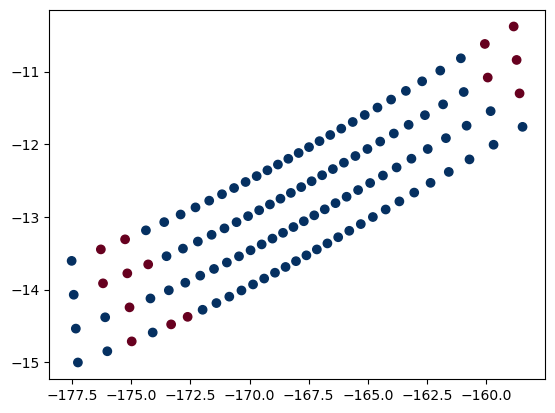

In [75]:
plt.show()
plt.scatter(lon, lat, c=qc, vmin=0, vmax=1, cmap='RdBu_r')
plt.show()

In [62]:
aod550.isel(Rows=slice(50,100), Columns=500)

<xarray.DataArray 'AOD550' (Rows: 50)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
    Latitude   (Rows) float32 ...
    Longitude  (Rows) float32 ...
Dimensions without coordinates: Rows
Attributes:
    long_name:    Aerosol optical depth at 550 nm
    units:        1
    valid_range:  [-0.05  5.  ]

# Combining data using xarray

# Time dimensions and variables

In [58]:
file_name = 'data/NUCAPS-EDR_v3r0_j01_s202211170044310_e202211170045010_c202211170121580.nc'
nucaps = xr.open_dataset(file_name, engine='netcdf4')

In [61]:
nucaps.Time.values[0]

numpy.datetime64('2022-11-17T00:44:31.983000000')

In [ ]:
nucaps = xr.open_dataset(file_name, engine='h5netcdf', decode_times=False)

In [ ]:
nucaps['Time']=nucaps['Time']/1000.0
nucaps.Time.attrs = {'units': 'seconds since 1970-01-01'}
nucaps = xr.decode_cf(nucaps)

# Opening and combining multiple files

In [32]:
files = glob.glob('data/JRR-AOD*')
files

['data/JRR-AOD_v2r3_j01_s202212140008049_e202212140009294_c202212140051190.nc',
 'data/JRR-AOD_v2r3_j01_s202212140009307_e202212140010534_c202212140051560.nc']

In [1]:
# Need condat dim, otherwise it won't know how to open
ds_2 = xr.open_mfdataset(files, concat_dim='Rows', engine='netcdf4', combine='nested')
ds_2

NameError: name 'xr' is not defined